In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [27]:
pd.set_option('display.max_columns', None)  #! Show all columns in DataFrame

In [28]:
df= pd.read_csv("crime_dataset.csv")
df

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,312,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,300,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,423,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,311,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN


# 🧹 Data Cleaning and Filtering

In [29]:
df['Date Reported']=pd.to_datetime(df['Date Reported'],errors='coerce').dt.date   #! This converts the 'Date Reported' column to datetime format and extracts the date part.
df['Date Reported']=pd.to_datetime(df['Date Reported'])

In [30]:
df['Date of Occurrence']=pd.to_datetime(df['Date of Occurrence'],errors='coerce').dt.date   #! This converts the 'Date Reported' column to datetime format and extracts the date part.
df['Date of Occurrence']=pd.to_datetime(df['Date of Occurrence'])

In [31]:
df['Time of Occurrence']=pd.to_datetime(df['Time of Occurrence'],errors='coerce').dt.time   #! This converts the 'Time of Occurrence' column to datetime format and extracts the time part.

In [32]:
df['Date Case Closed']=pd.to_datetime(df['Date Case Closed'],errors='coerce').dt.date   #! This converts the 'Date Case Closed' column to datetime format and extracts the date part.
df['Date Case Closed']=pd.to_datetime(df['Date Case Closed'])

In [33]:
df.drop(columns=['Time of Occurrence'], inplace=True)

# Cities with most Crimes Rates

In [ ]:
city_counts=df['City'].value_counts().head(10)
city_counts

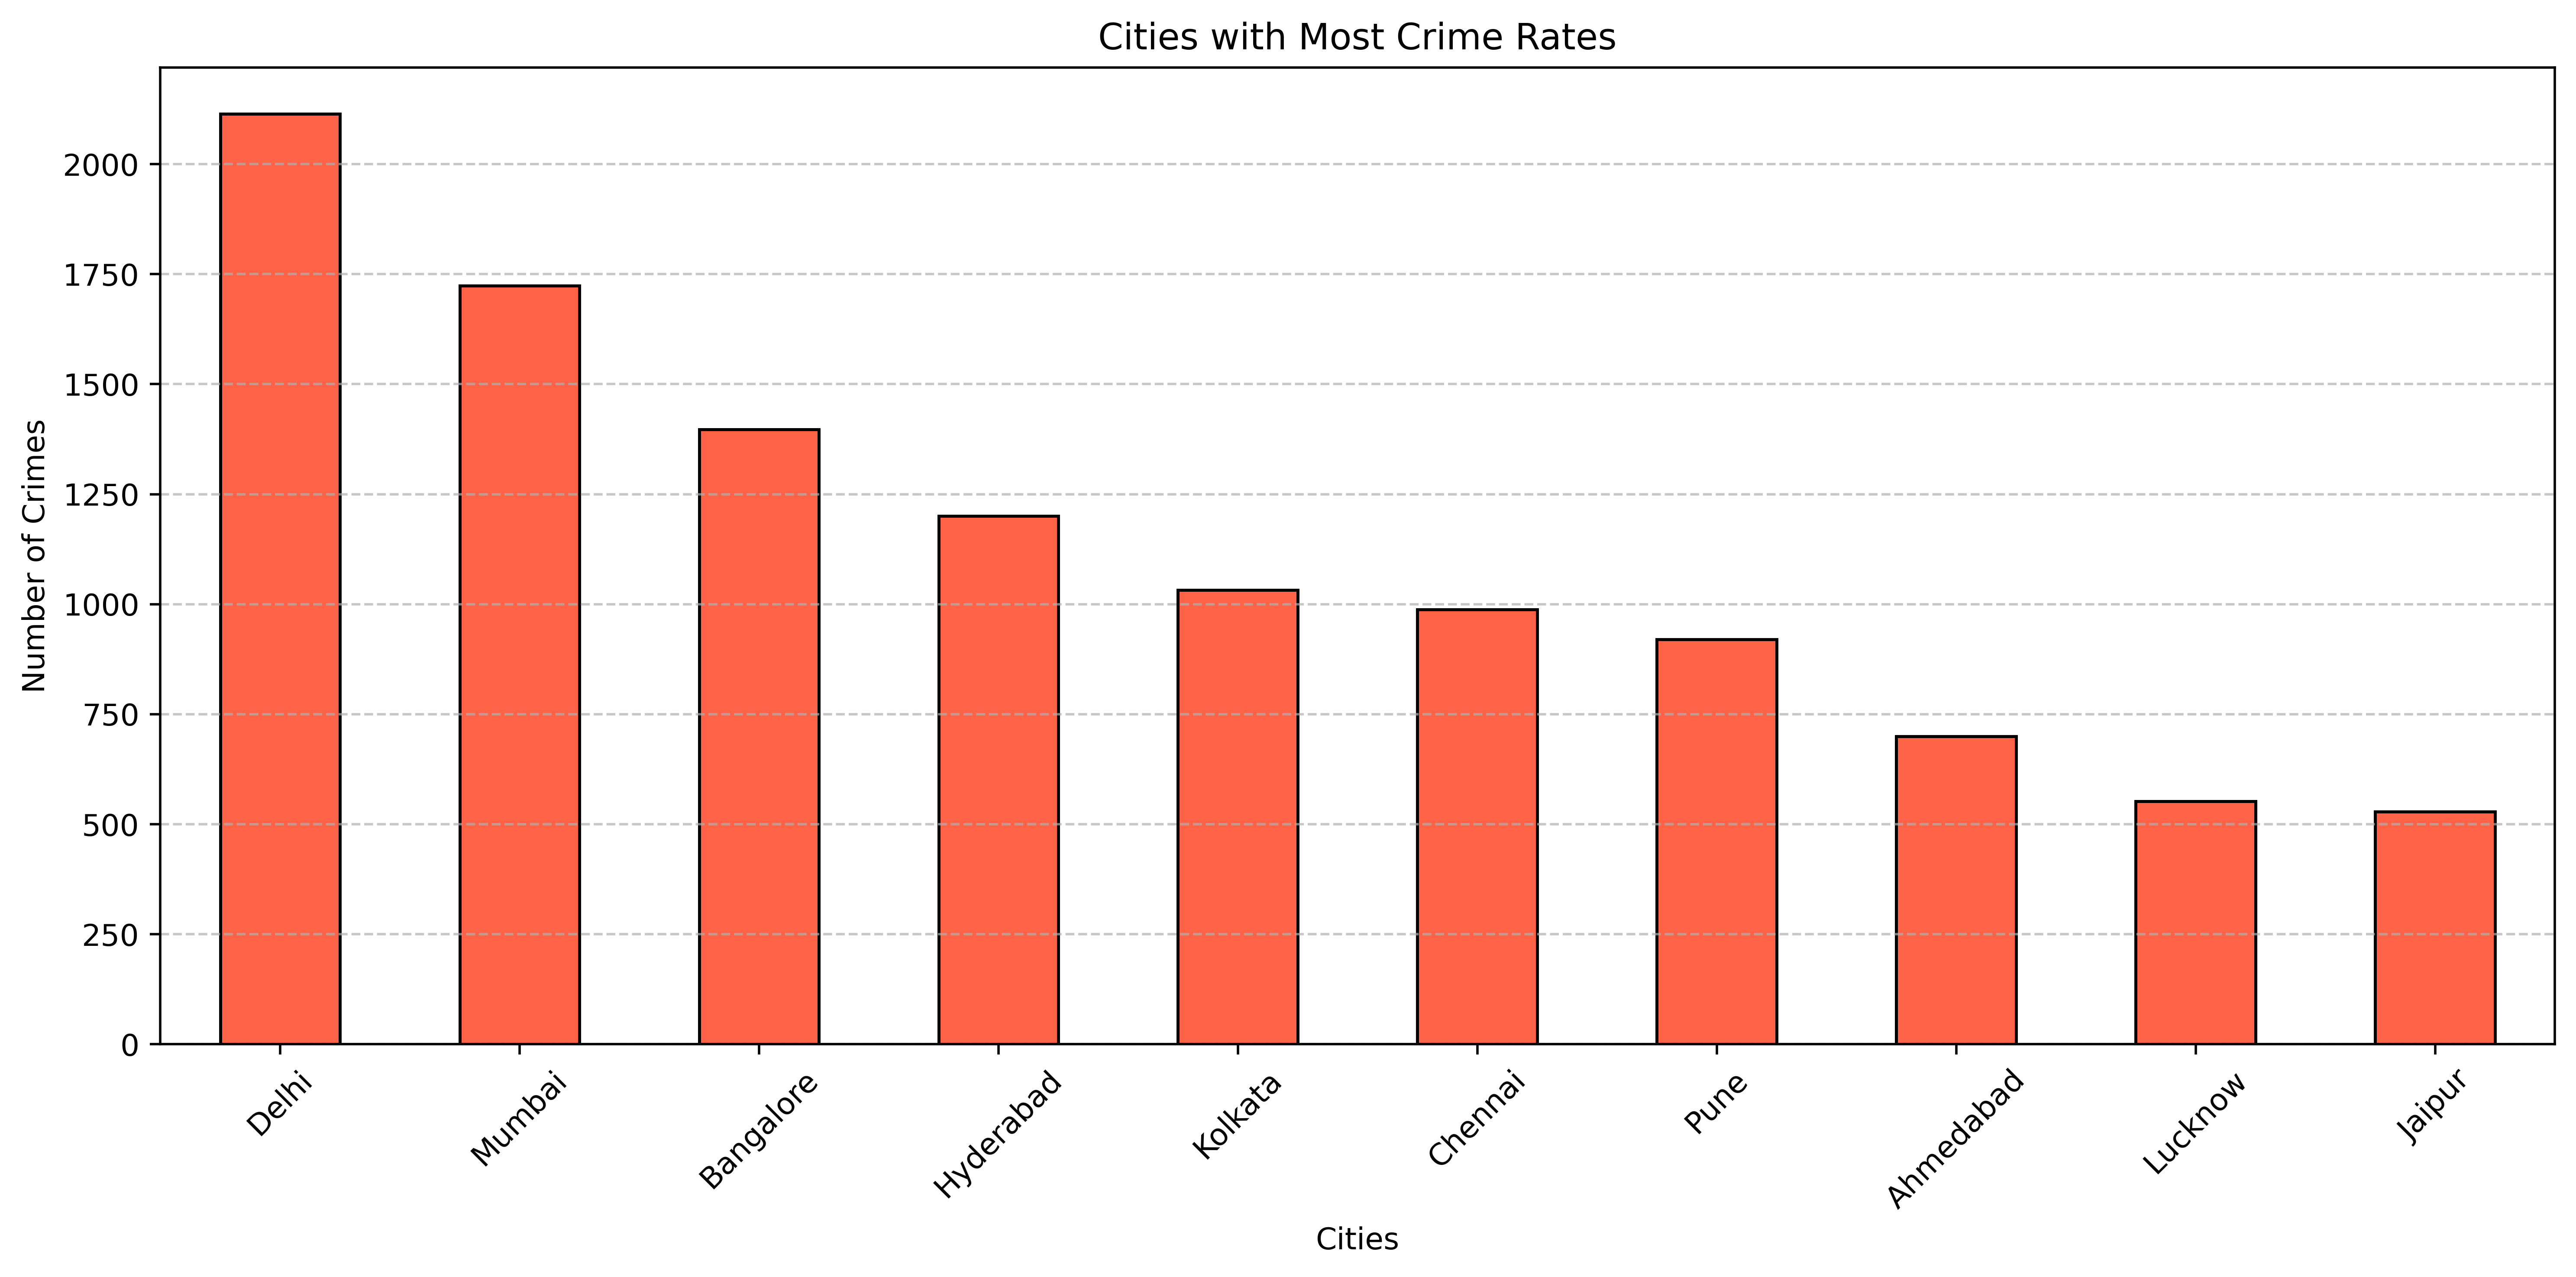

In [54]:
plt.figure(figsize=(12,6),dpi=500)
city_counts.plot(kind='bar',color='tomato',edgecolor='black')
plt.title('Cities with Most Crime Rates')
plt.xticks(rotation=45)
plt.xlabel("Cities")
plt.ylabel("Number of Crimes")
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout();

# Yearly Crime Trends

In [36]:
df['Date Reported']= pd.to_datetime(df['Date Reported'], errors='coerce')
df = df.dropna(subset=['Date Reported'])  # Drop rows where 'Date Reported' is NaT
df['Year']=df['Date Reported'].dt.year.astype(int)

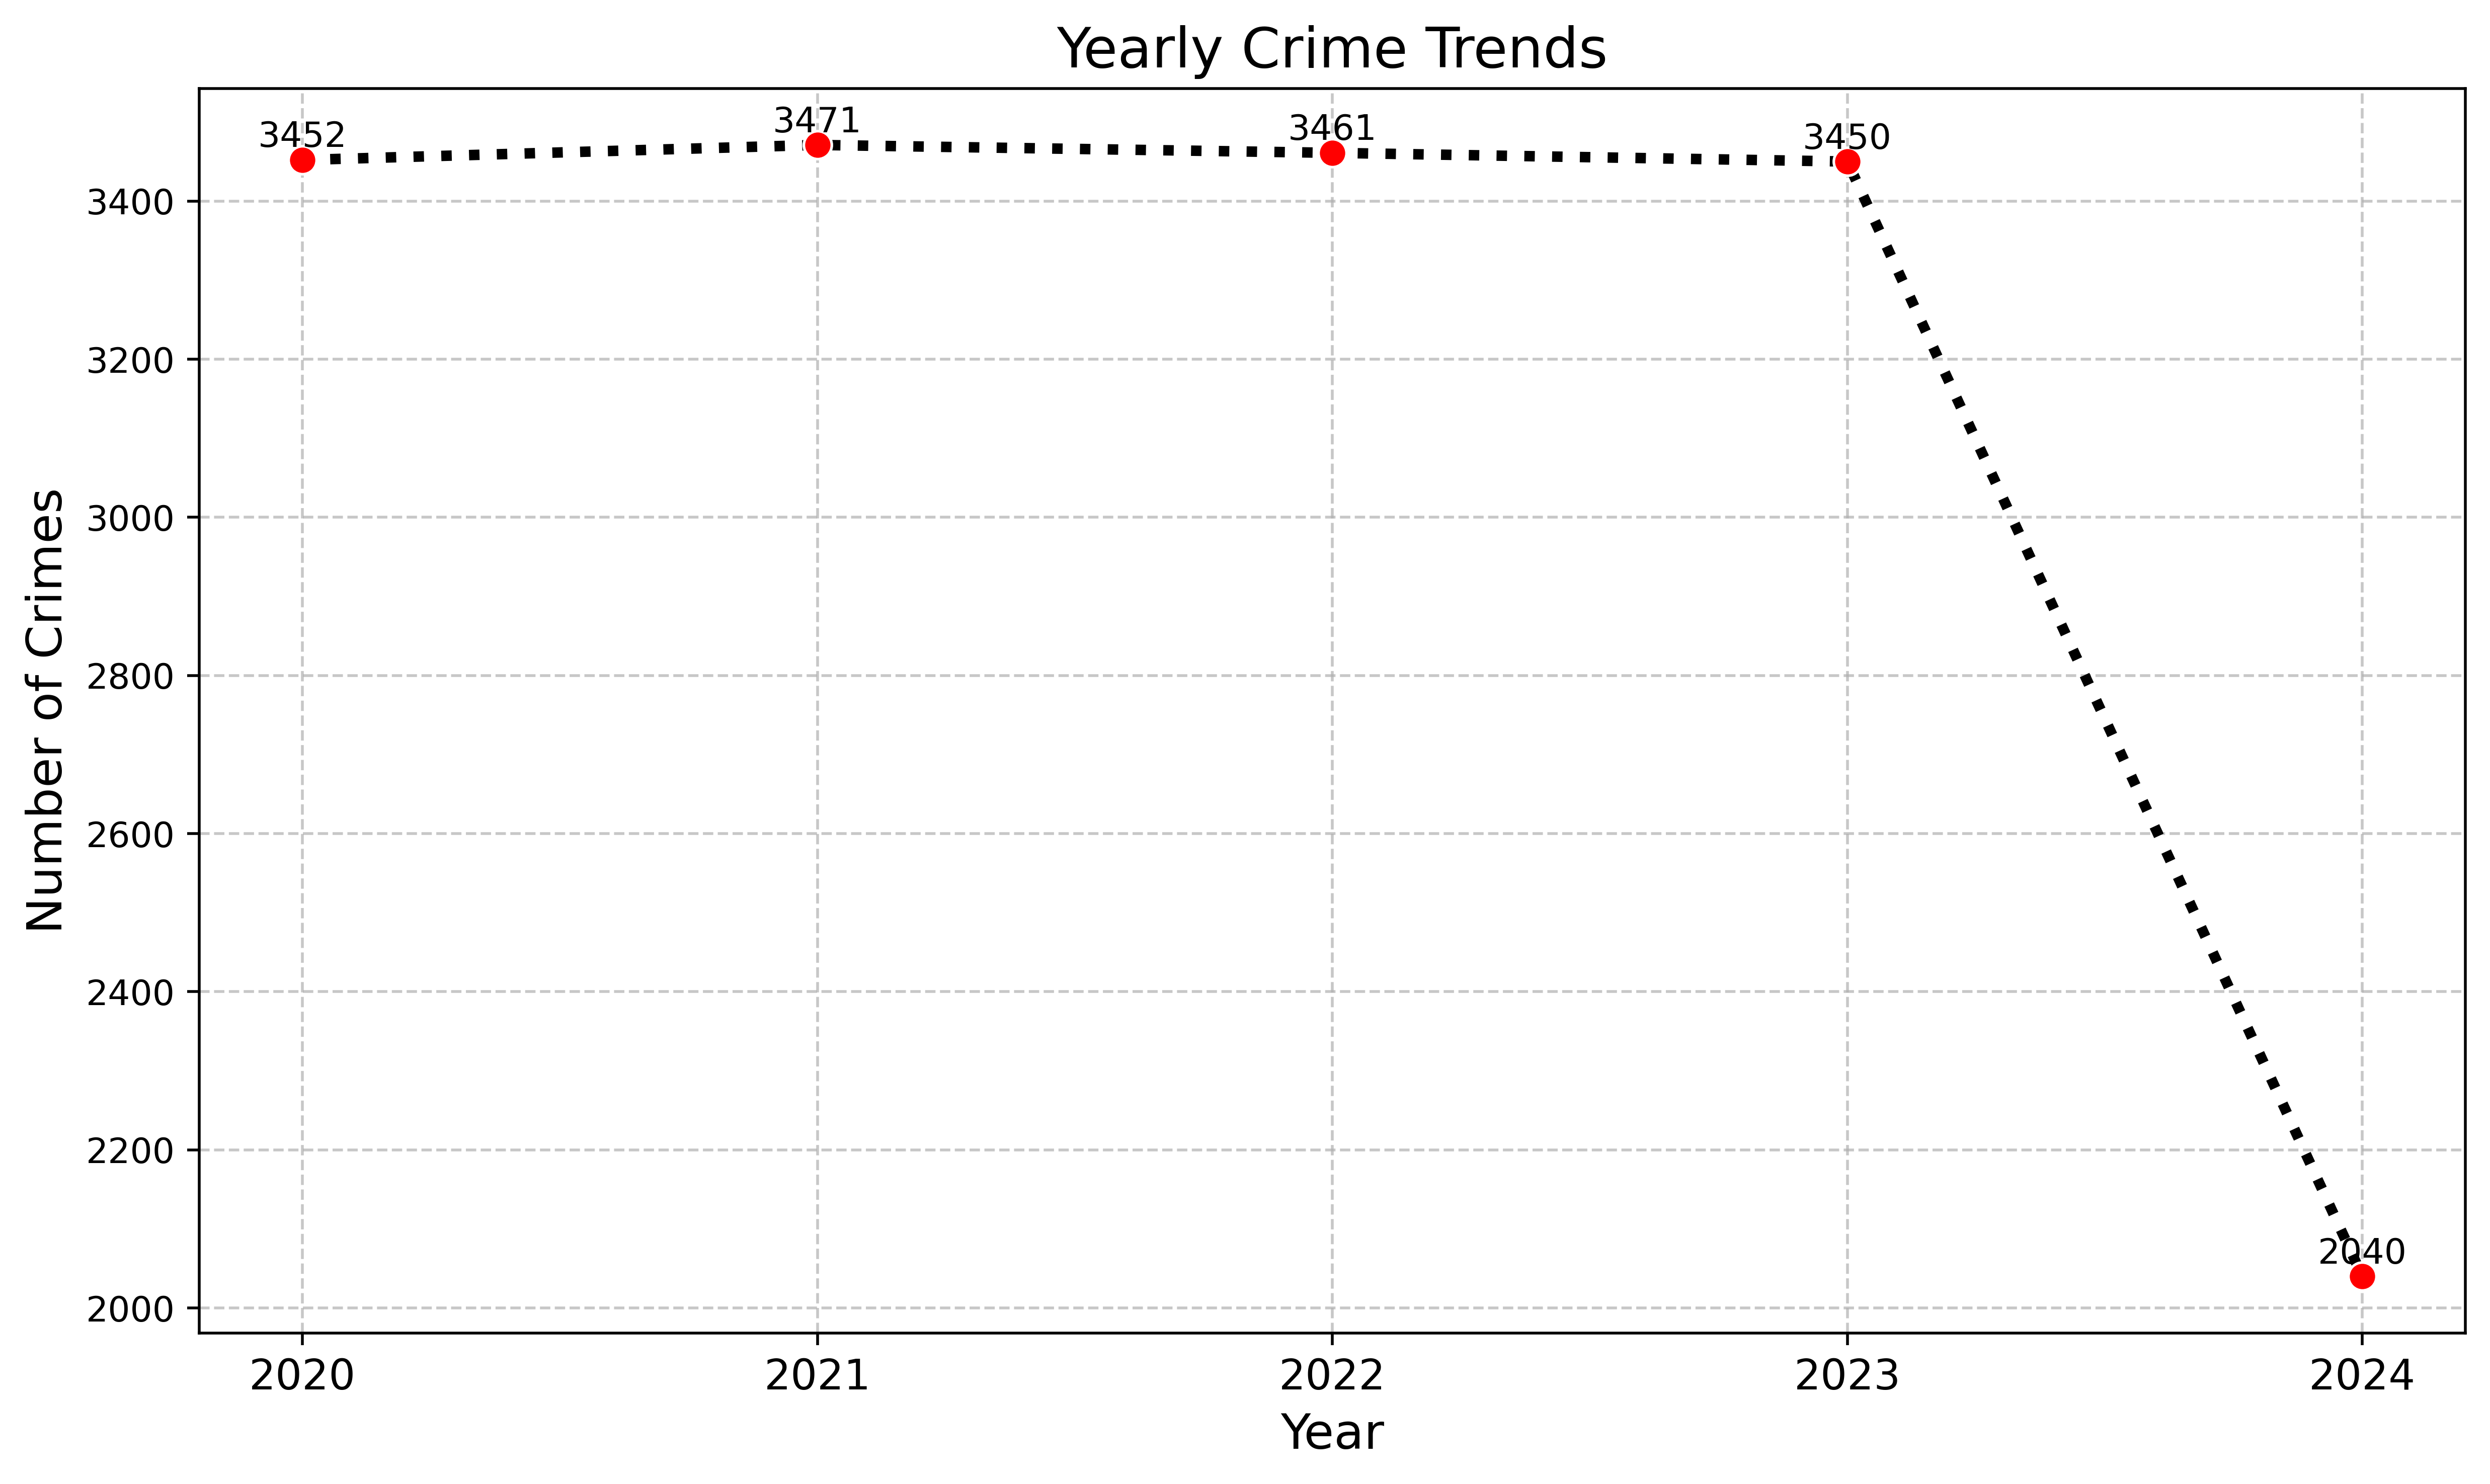

In [37]:
yearly_crime = df.groupby(['Year']).size().reset_index(name='Crime Count')

plt.figure(figsize=(10,6), dpi=500)
sns.lineplot(data=yearly_crime, x='Year', y='Crime Count', marker='o', color='black', markerfacecolor ='red', markersize=8,ls='dotted',lw=3)
plt.title('Yearly Crime Trends', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(ticks=yearly_crime['Year'], fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)

for i in range(len(yearly_crime)):
  year= yearly_crime['Year'].iloc[i]
  count= yearly_crime['Crime Count'].iloc[i]
  plt.text(year, count + 50, str(count), ha='center', va='top', fontsize=10, color='black')   #~ +50 is used to shoft the text label slightly above the data points, so it does not overlap with the dot on the line plot and str(count) is to convert numbers into string
plt.tight_layout()
plt.show()

# Crime Type Rate

In [ ]:
crime_counts=df['Crime Description'].value_counts()
crime_counts

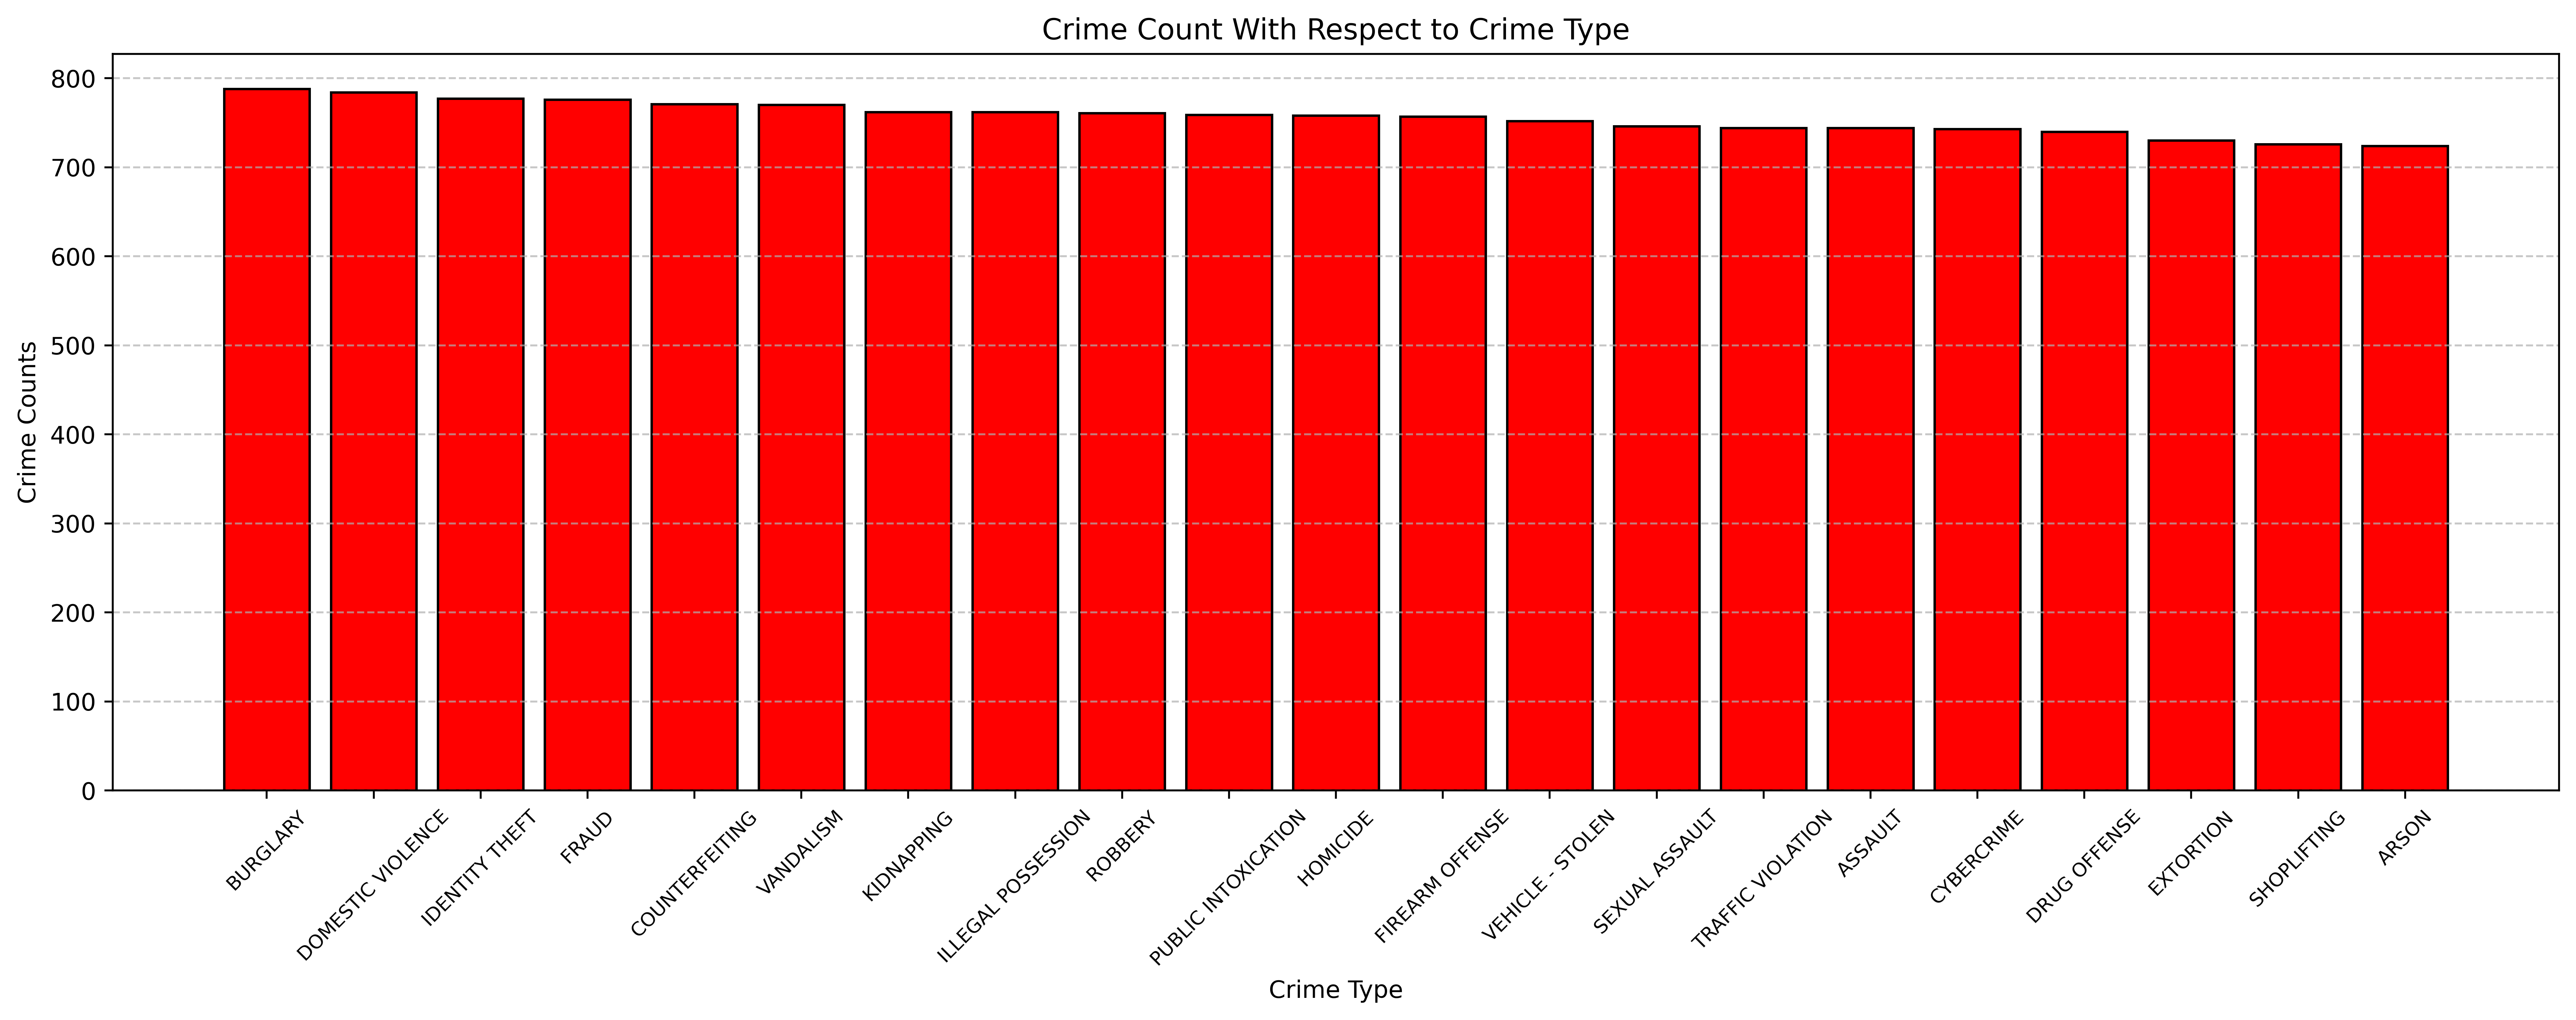

In [56]:
plt.figure(figsize=(15,6),dpi=500)
plt.bar(crime_counts.index, crime_counts.values, color='red',edgecolor='black')
plt.title('Crime Count With Respect to Crime Type',fontsize=12)
plt.xticks(rotation=45, fontsize=8)
plt.xlabel('Crime Type', fontsize=10)
plt.ylabel('Crime Counts', fontsize=10)
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.tight_layout();

# Crime with respect to Ages

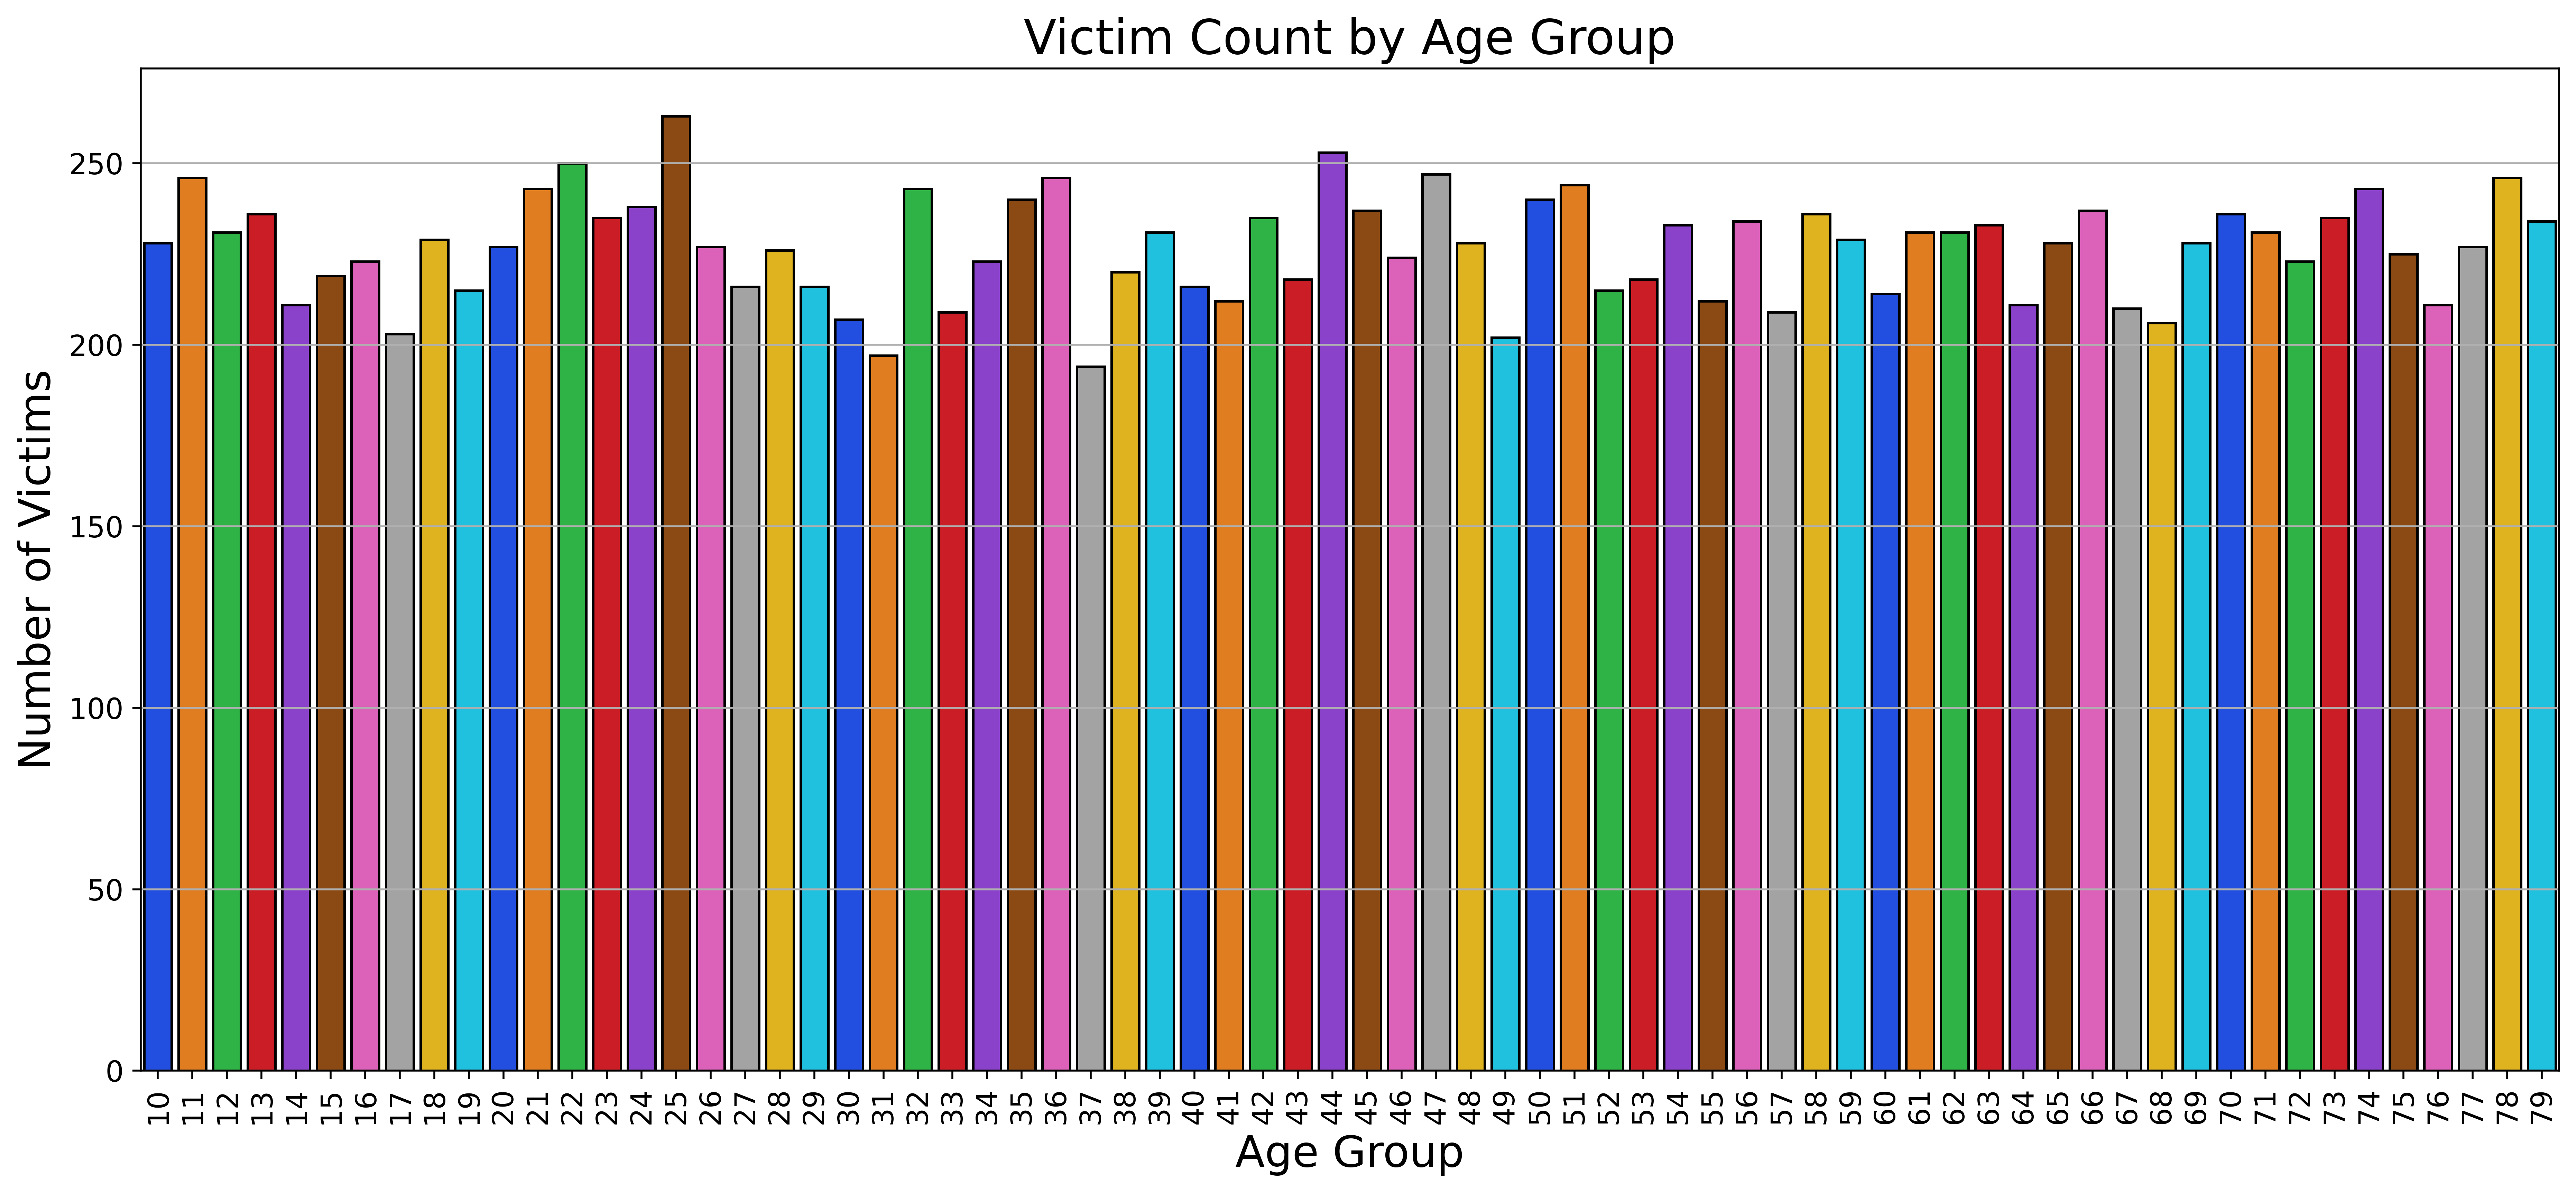

In [57]:
# Count age groups
age_group_counts = df['Victim Age'].value_counts().sort_index()

# Plot
plt.figure(figsize=(15, 7), dpi=500)
sns.countplot(data=df, x='Victim Age', palette='bright', order=age_group_counts.index,edgecolor='black')
plt.title('Victim Count by Age Group', fontsize=20)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Number of Victims',fontsize=18)
plt.grid(axis='y')
plt.tight_layout();

# Crime Distribution by Victim_Gender

In [ ]:
label_mapping = {
    'M': 'Male',
    'F': 'Female',
    'X': 'Unknown'
}

# Apply the mapping to the 'Victim Gender' column
df['Victim Gender'] = df['Victim Gender'].map(label_mapping)


gender_counts = df['Victim Gender'].value_counts()

# Prepare data for the pie chart
labels = gender_counts.index
sizes = gender_counts.values
gender_counts

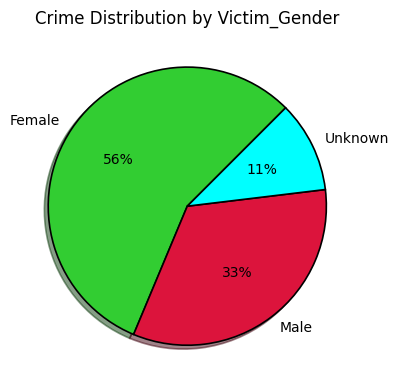

In [42]:
colors = ['limegreen','crimson','cyan'] 
plt.figure(figsize=(10,4))
gender_counts.plot(kind='pie',labels=labels, autopct='%0.0f%%',colors=colors,wedgeprops={"edgecolor":'black','linewidth':1.2},shadow=True,startangle=45)
plt.title('Crime Distribution by Victim_Gender');
plt.ylabel('')
plt.tight_layout();

# Crime Domain

In [ ]:
crime_domain=df['Crime Domain'].value_counts()
crime_domain

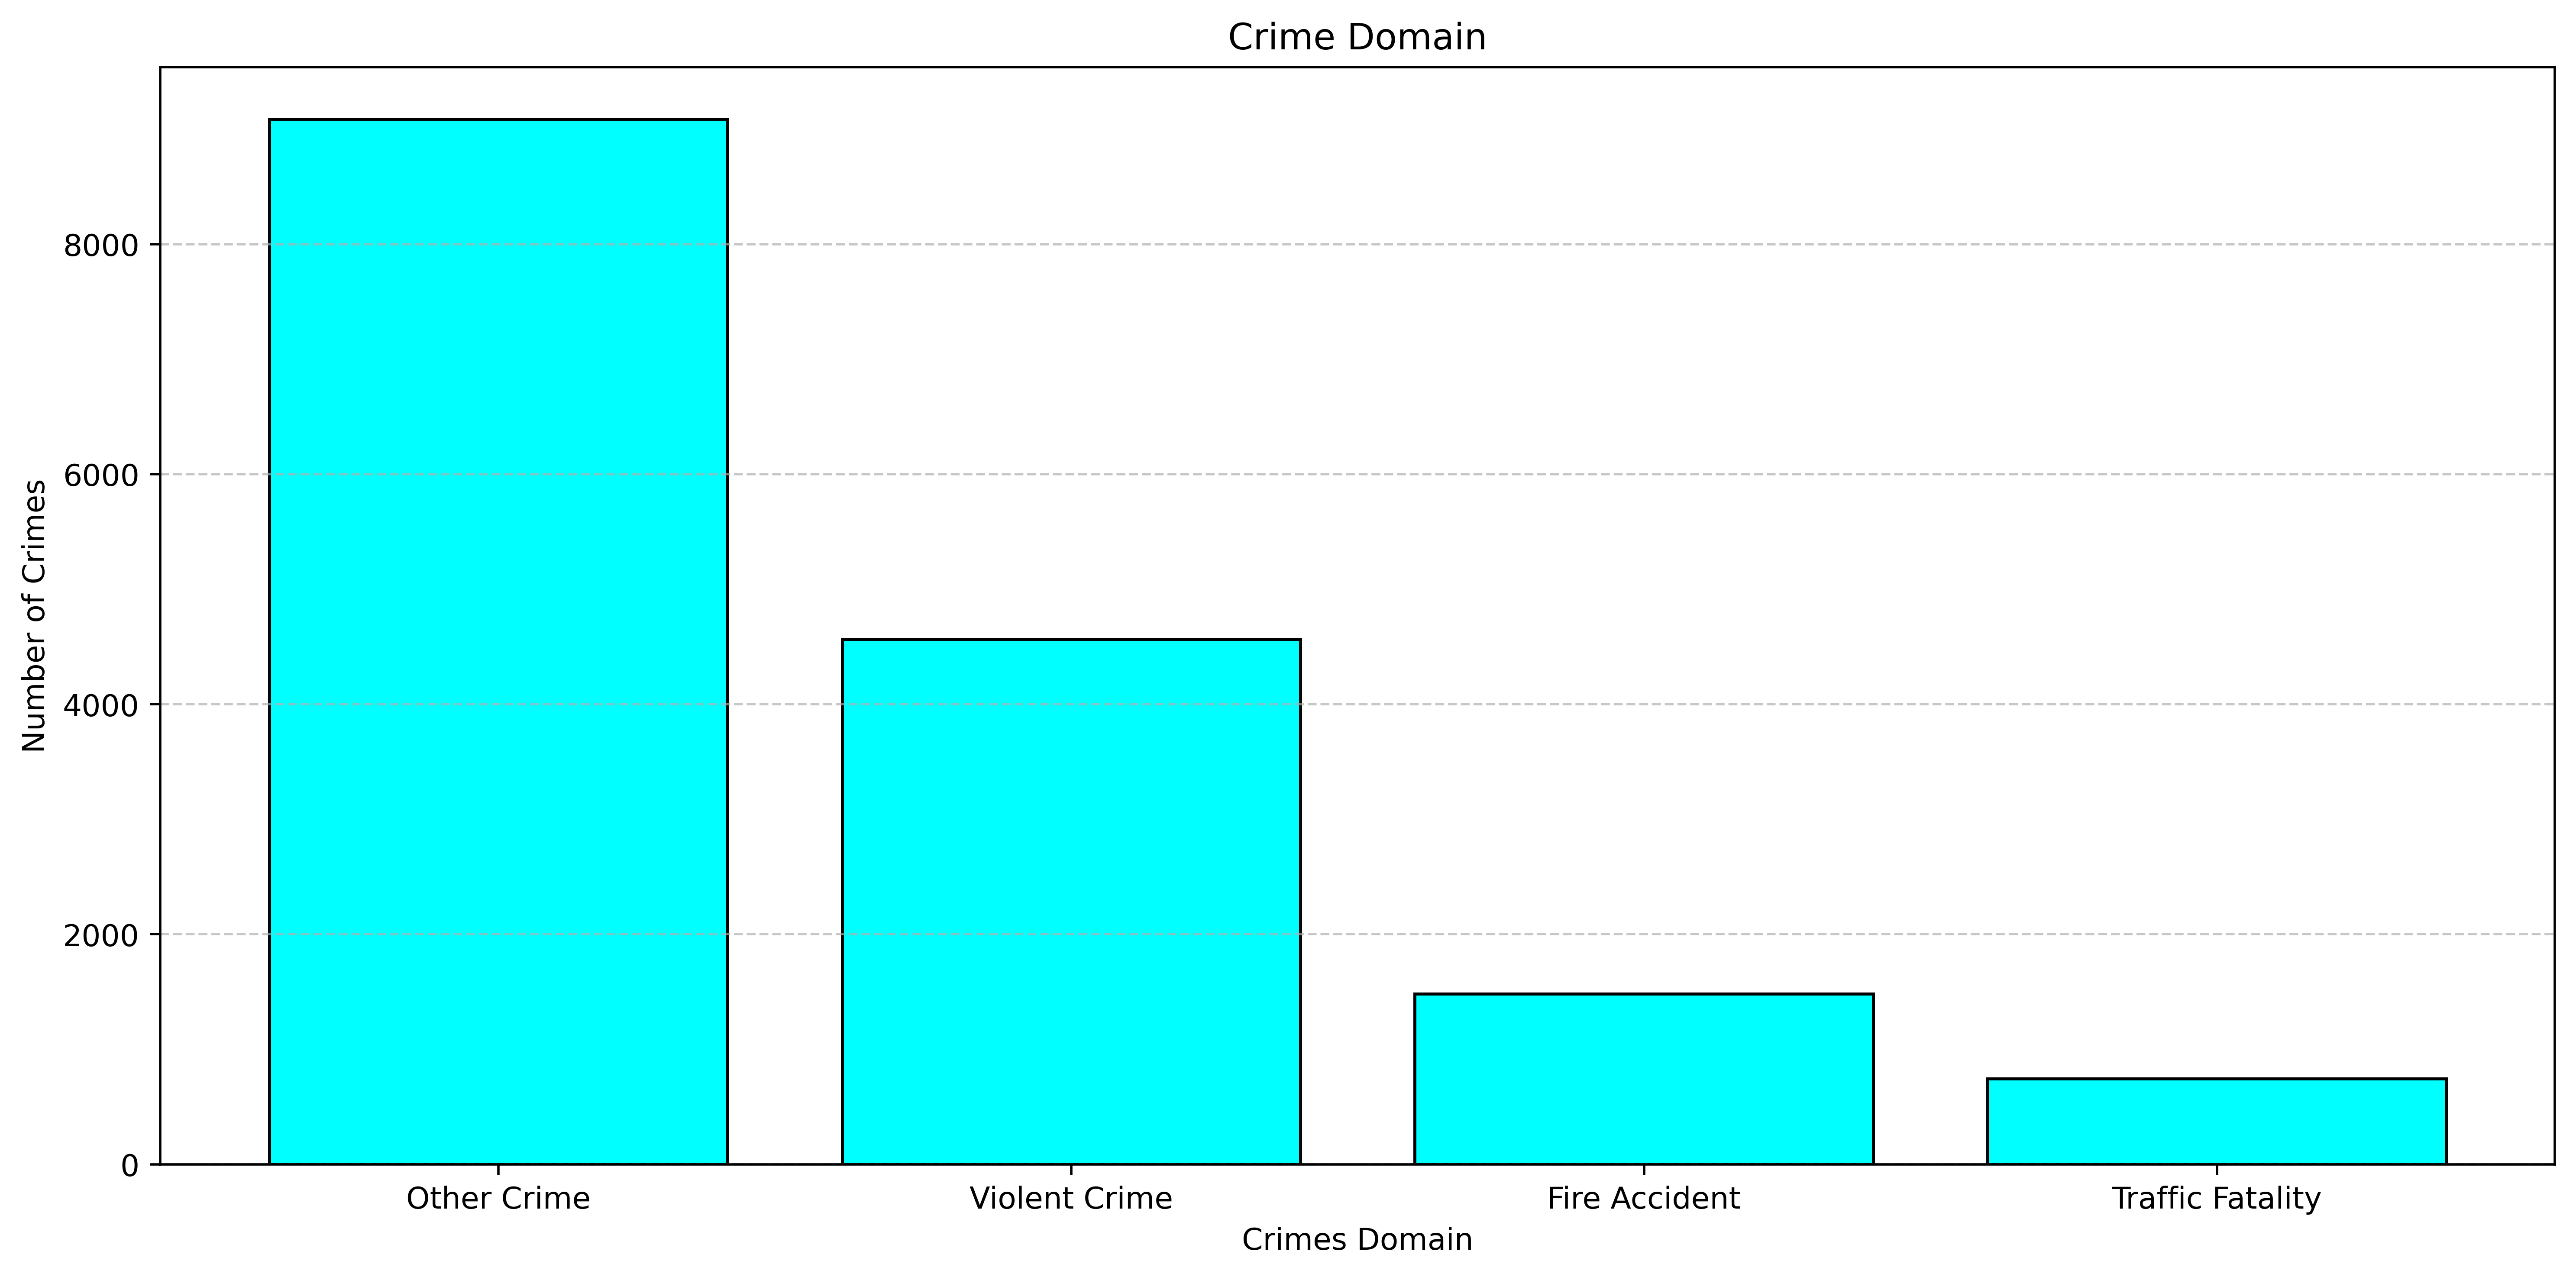

In [44]:
plt.figure(figsize=(12,6),dpi=500)
plt.bar(crime_domain.index, crime_domain.values, color='cyan',edgecolor='black')
plt.title('Crime Domain')
plt.xlabel('Crimes Domain')
plt.ylabel('Number of Crimes')
plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.tight_layout();

In [45]:
df.drop(columns='Date Case Closed',inplace=True)

# Case Status i.e. Case Closed or not

In [ ]:
case_status=df['Case Closed'].value_counts()
case_status

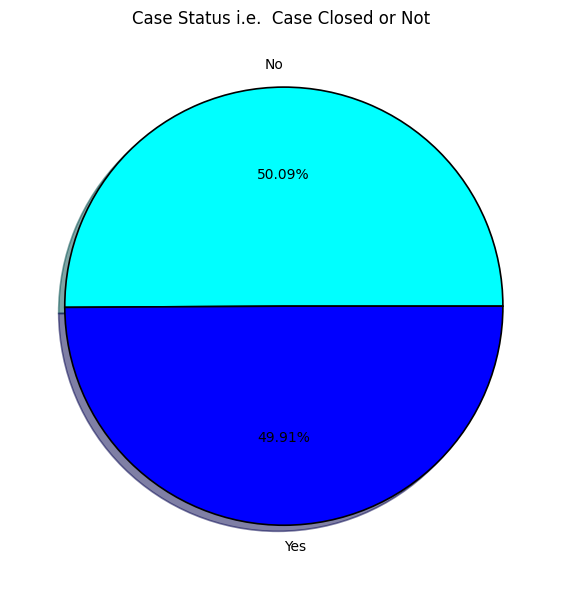

In [47]:
colors=['cyan','blue']
plt.figure(figsize=(12,6))
case_status.plot(kind='pie', autopct='%1.2f%%',colors=colors,wedgeprops={"edgecolor":'black','linewidth':1.2},shadow=True);
plt.title('Case Status i.e.  Case Closed or Not ')
plt.ylabel('')
plt.tight_layout();

# Total Police Deployed by Crime Domain

In [ ]:
police_by_domain=df.groupby(['Crime Domain'])['Police Deployed'].sum().sort_values(ascending=False)
police_by_domain

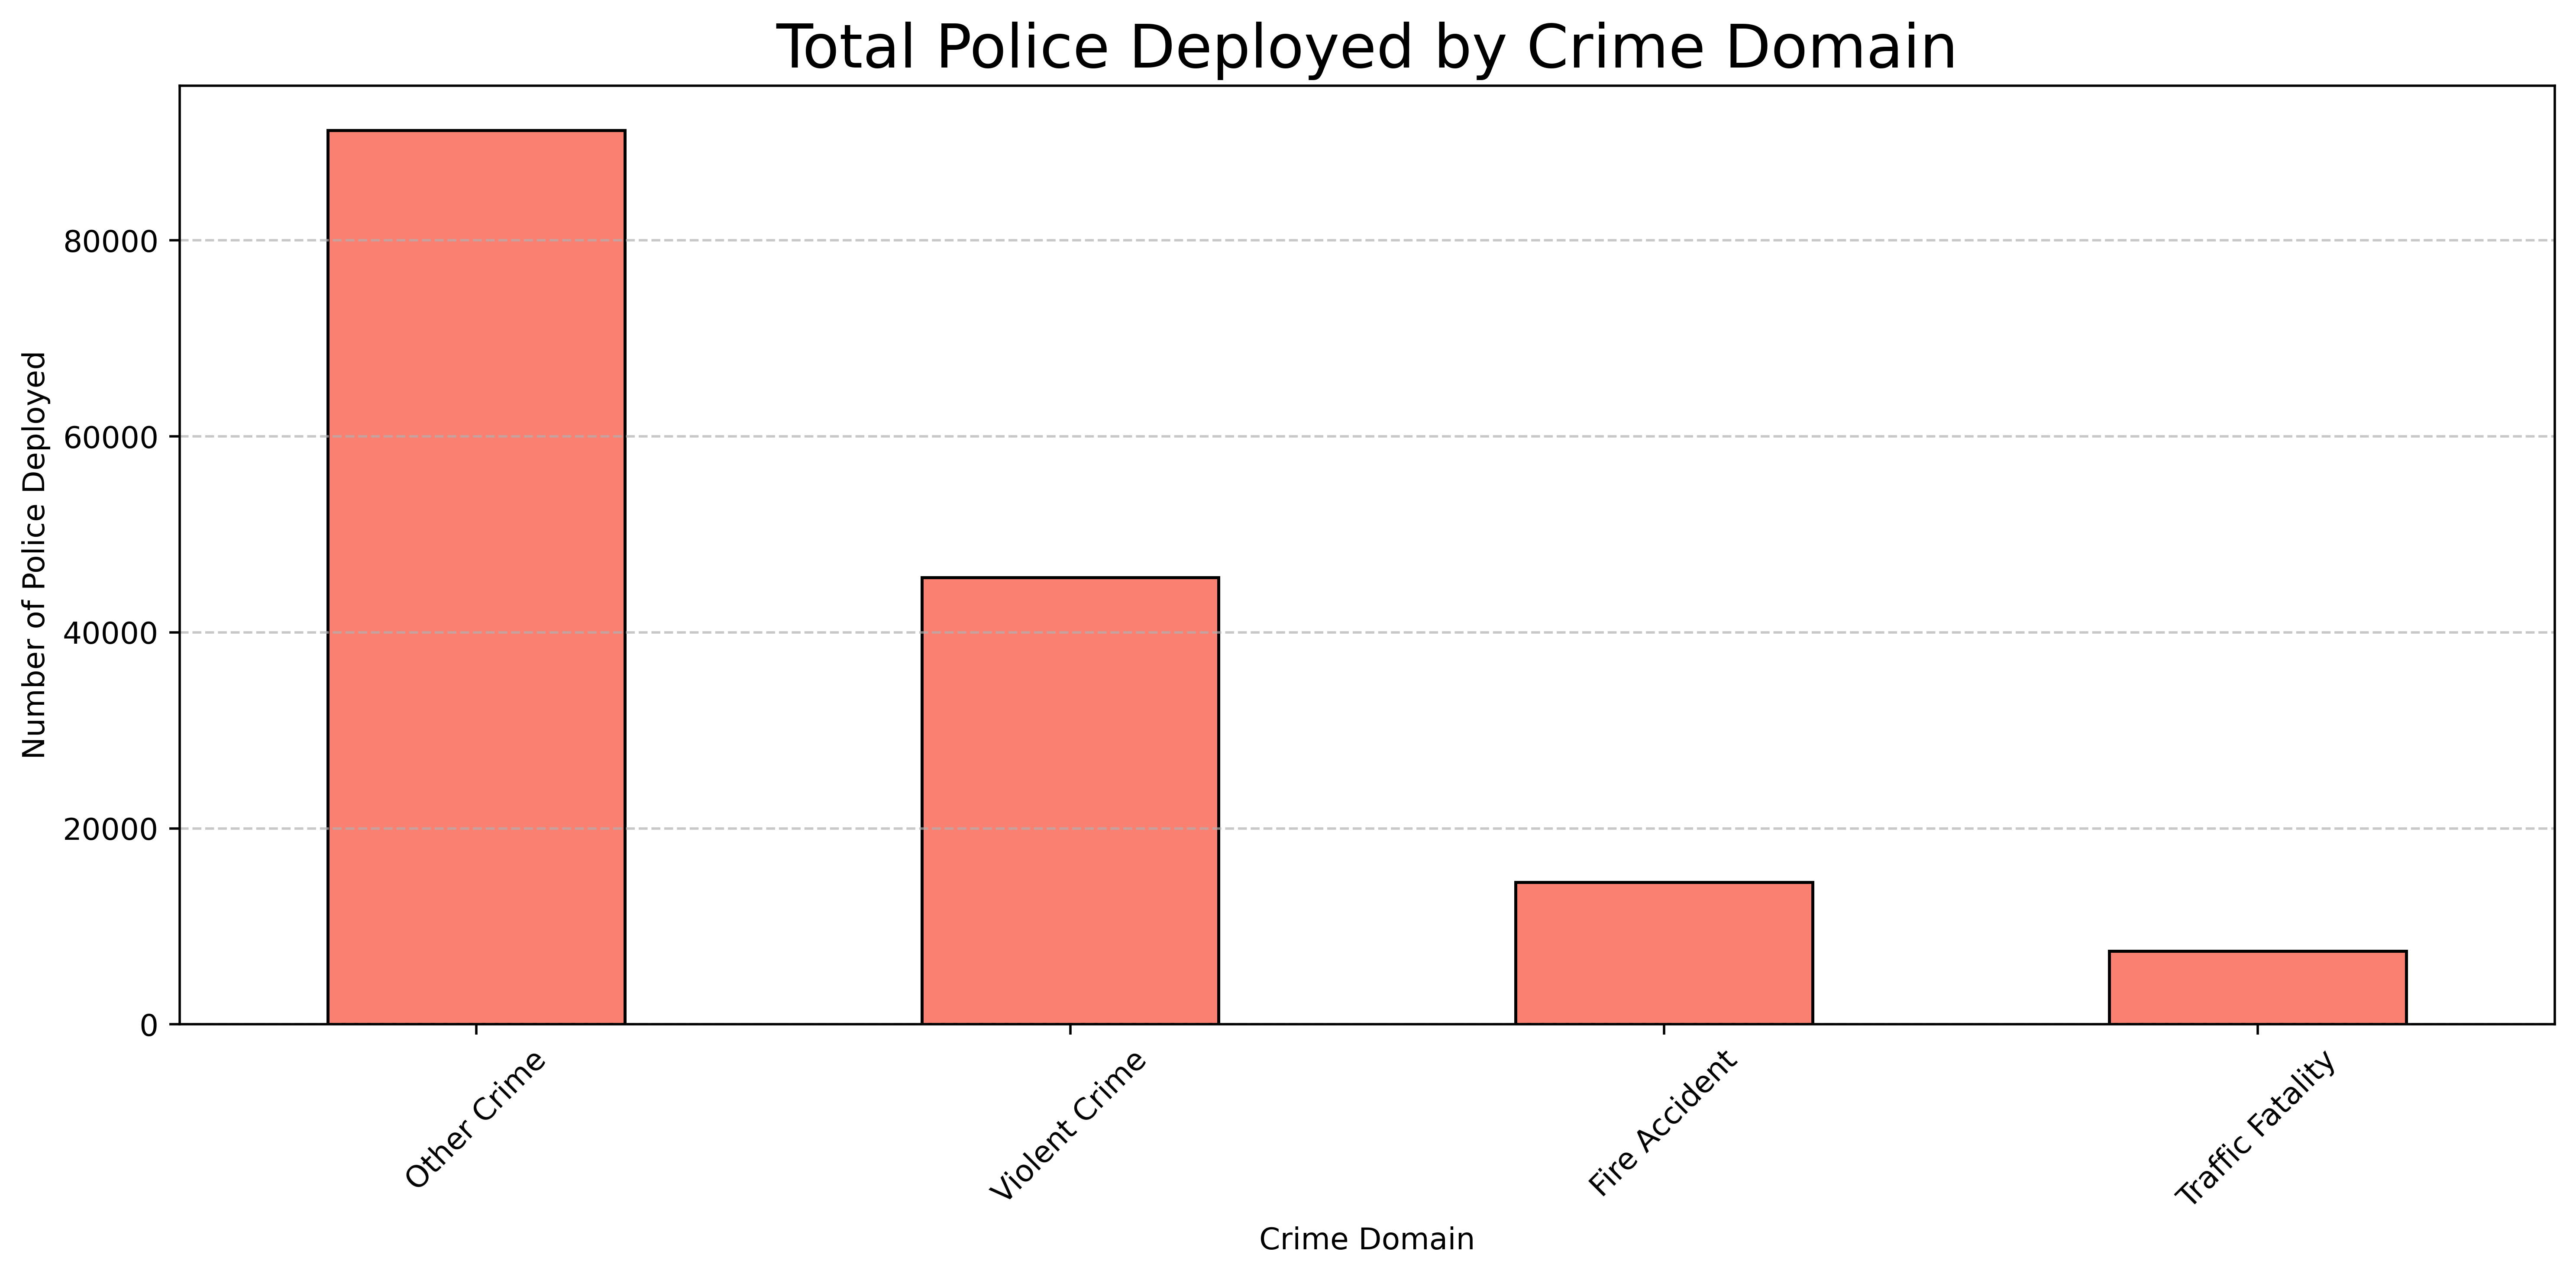

In [50]:
plt.figure(figsize=(12,6),dpi=500)
police_by_domain.plot(kind='bar',color='salmon',edgecolor='black')
plt.title('Total Police Deployed by Crime Domain',fontsize=20)
plt.xticks(rotation=45)
plt.ylabel('Number of Police Deployed')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout();

# Crime Domain Distribution in Top 10 Cities

In [ ]:
city_domain_df=df.groupby(['City','Crime Domain']).size().reset_index(name='Count')
top_cities=df['City'].value_counts().head(10).index
filtered_df= city_domain_df[city_domain_df['City'].isin(top_cities)]
filtered_df

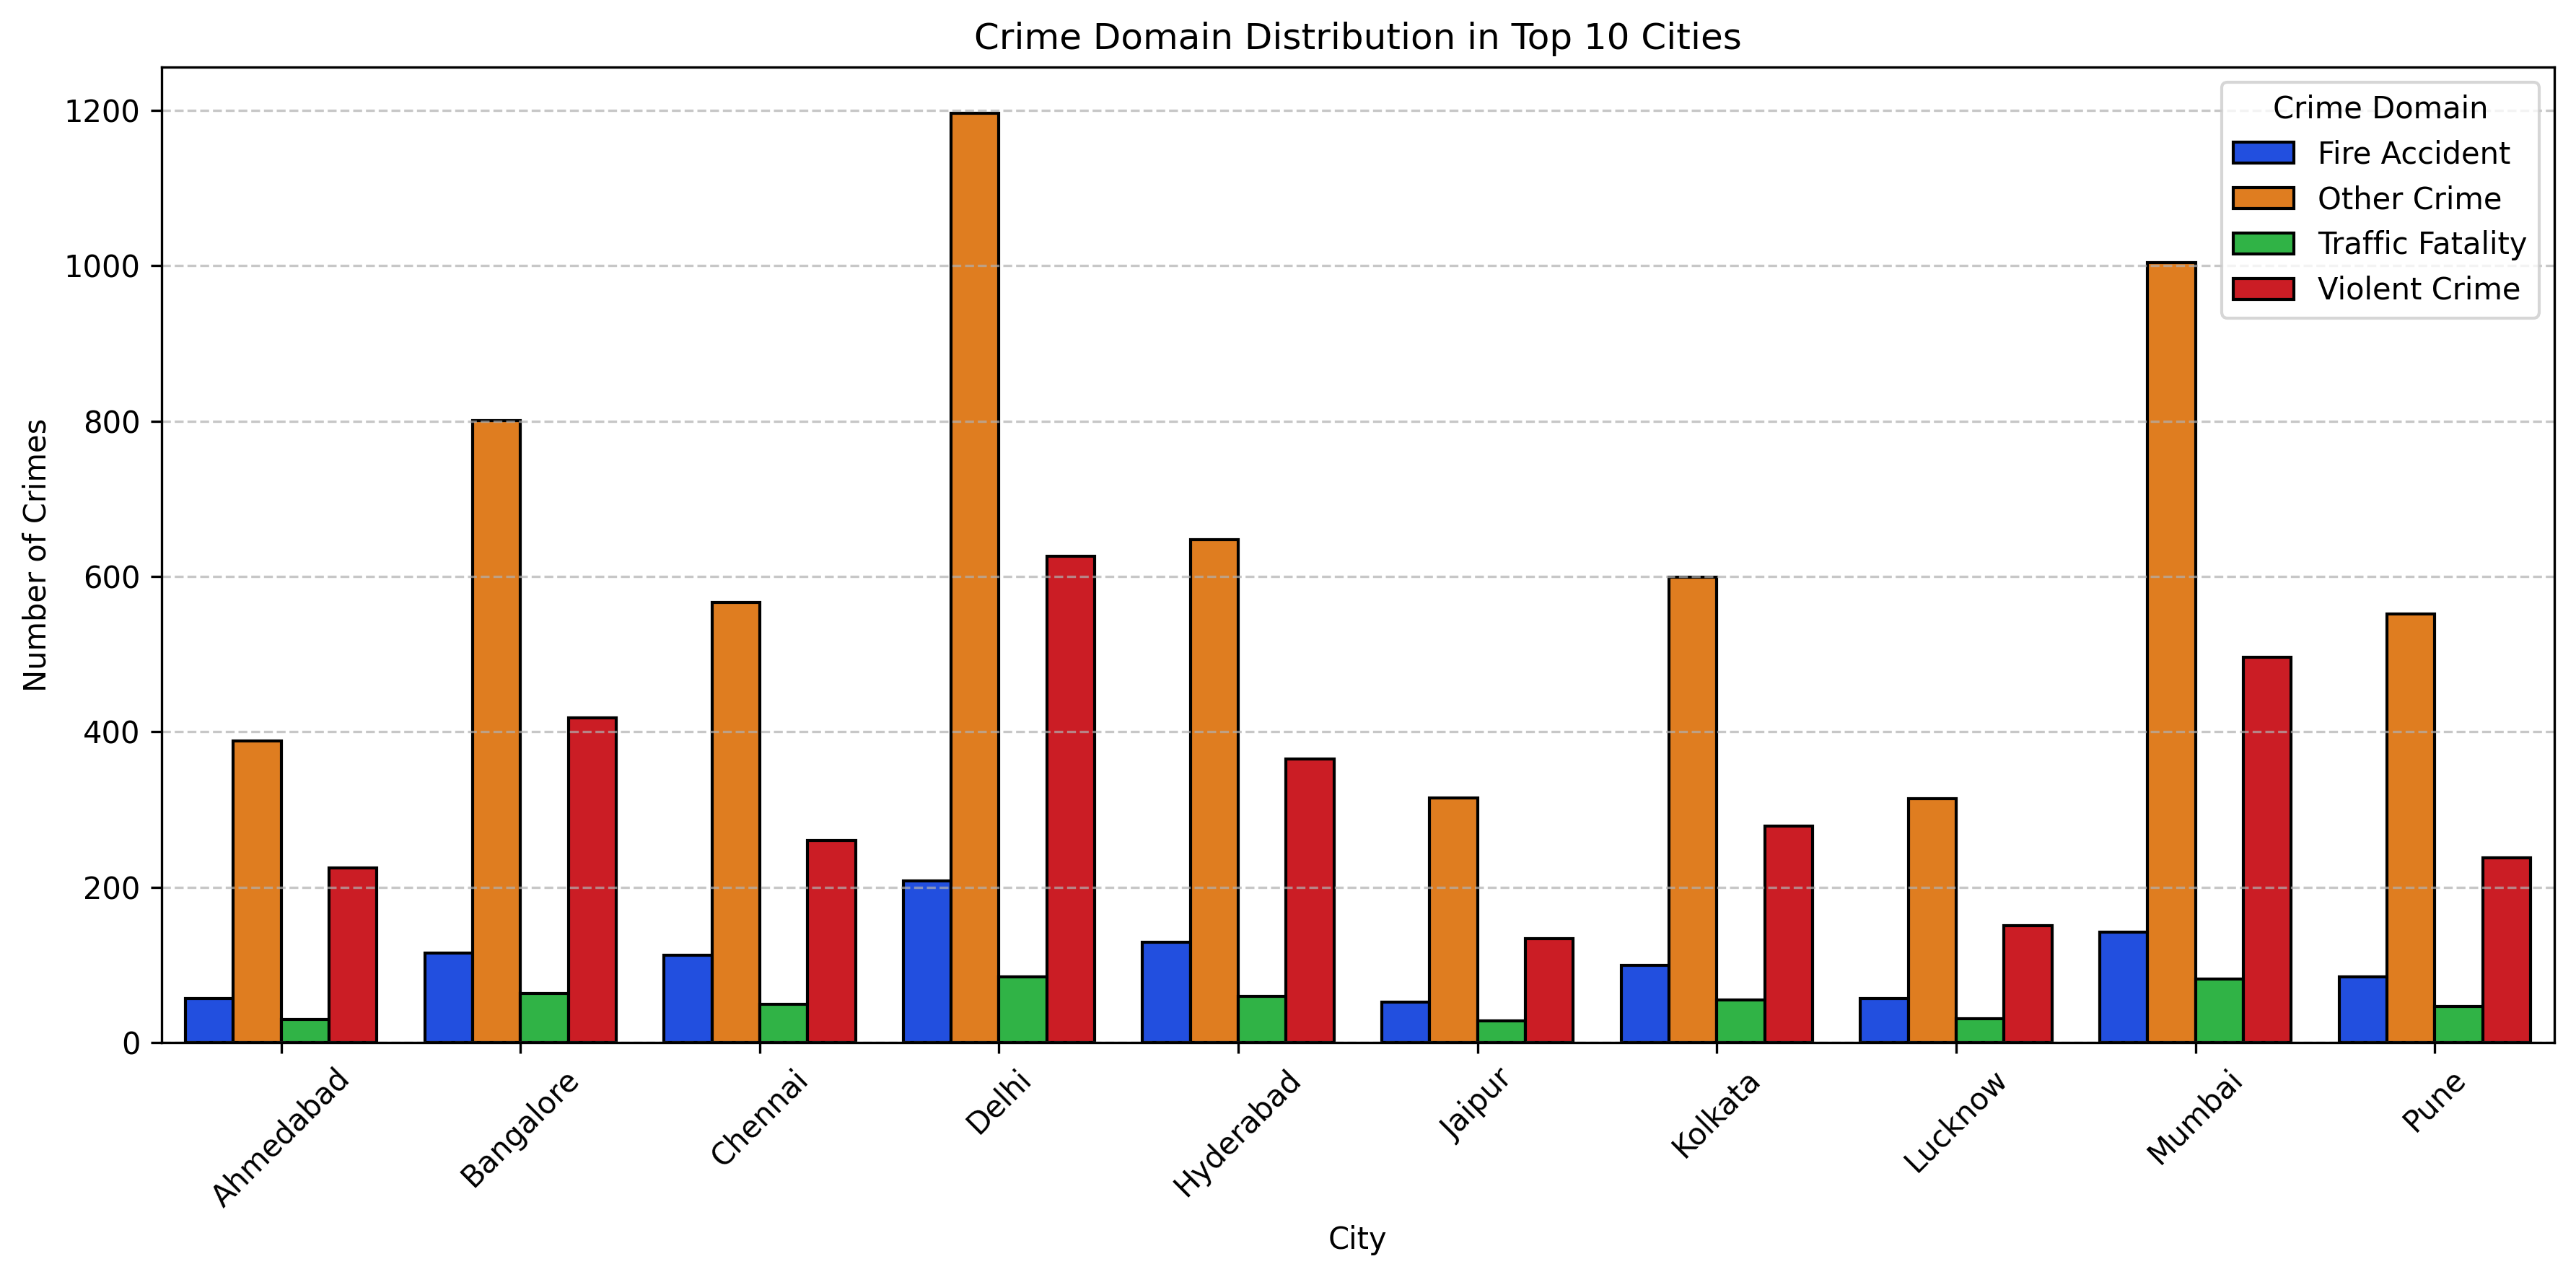

In [52]:
plt.figure(figsize=(12,6),dpi=300)
sns.barplot(data=filtered_df, x='City',y='Count',hue='Crime Domain',palette='bright',edgecolor='black')
plt.title('Crime Domain Distribution in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout();

# Crime Count by Victim Gender in Cities

In [ ]:
crime_by_gender=df.groupby(['City','Victim Gender']).size().reset_index(name='Count')
crime_by_gender

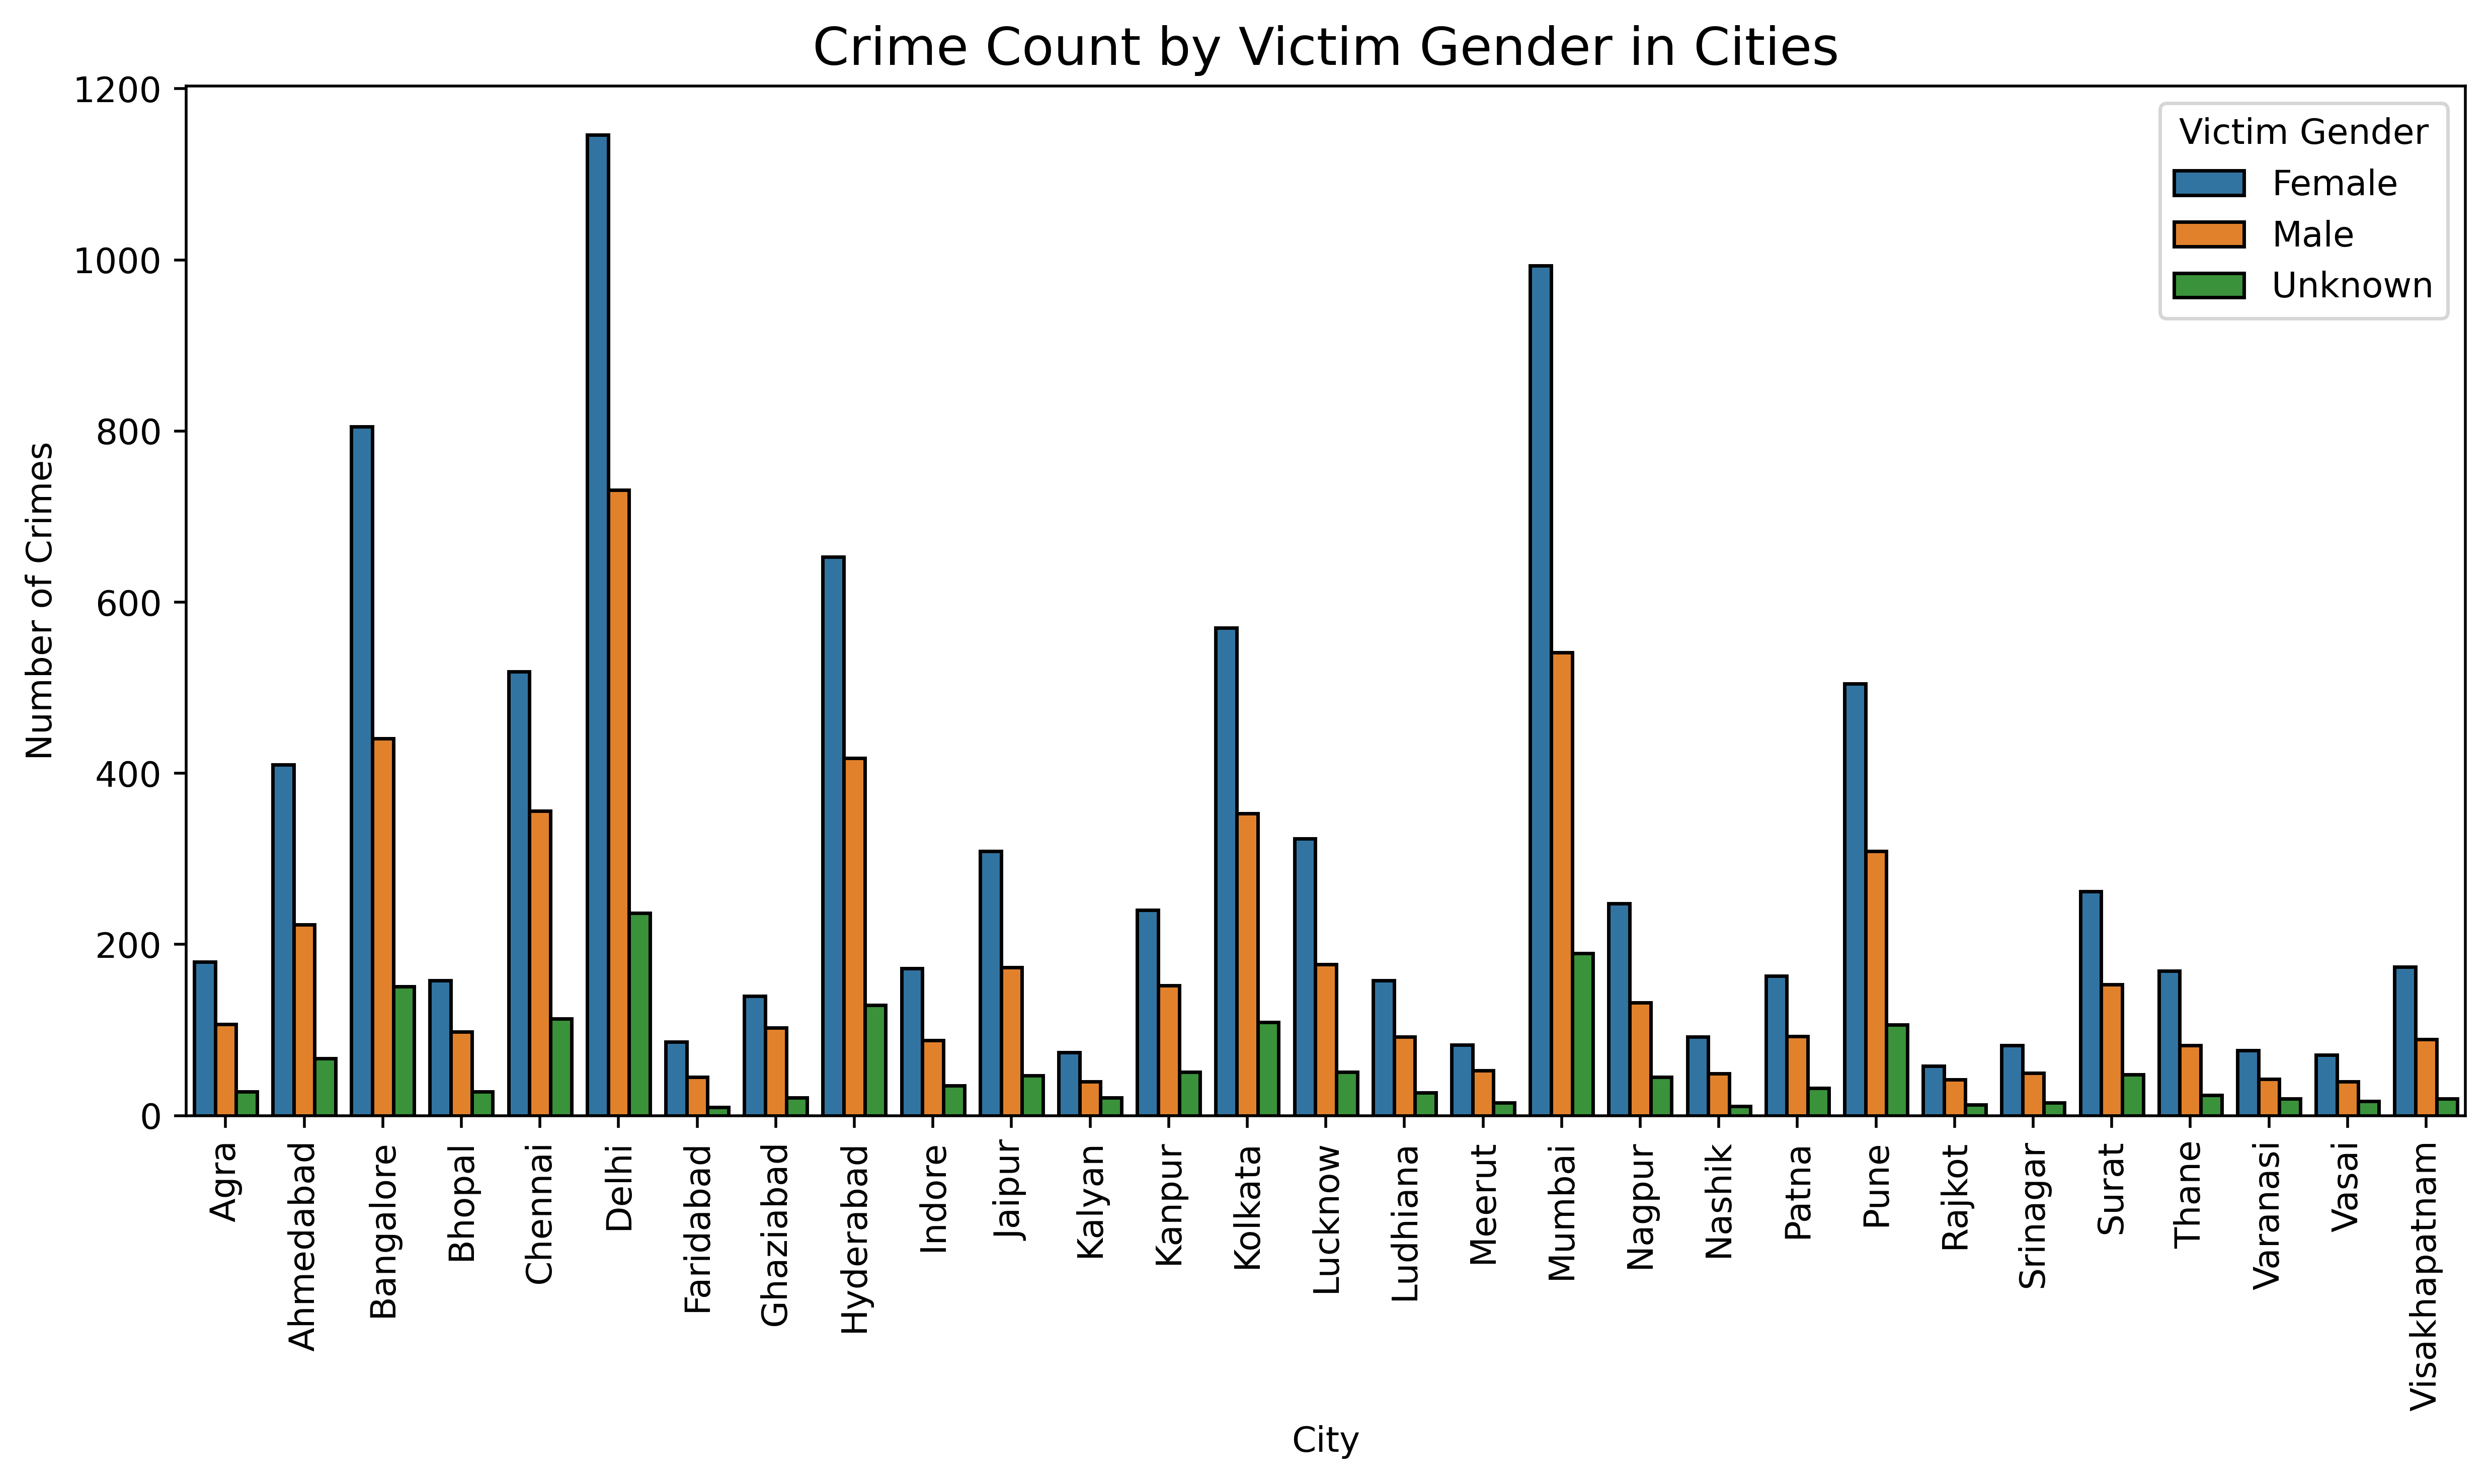

In [82]:

plt.figure(figsize=(10, 6),dpi=500)
sns.barplot(data=crime_by_gender, x='City', y='Count', hue='Victim Gender', palette='tab10',edgecolor='black')
plt.title("Crime Count by Victim Gender in Cities",fontsize=15)
plt.ylabel("Number of Crimes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [83]:
df.head()

,Report Number,Date Reported,Date of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Year
0,1,2020-02-01,2020-01-01,Ahmedabad,576,IDENTITY THEFT,16,Male,Blunt Object,Violent Crime,13,No,2020
1,2,2020-01-01,2020-01-01,Chennai,128,HOMICIDE,37,Male,Poison,Other Crime,9,No,2020
2,3,2020-02-01,2020-01-01,Ludhiana,271,KIDNAPPING,48,Female,Blunt Object,Other Crime,15,No,2020
3,4,2020-01-01,2020-01-01,Pune,170,BURGLARY,49,Female,Firearm,Other Crime,1,Yes,2020
4,5,2020-01-01,2020-01-01,Pune,421,VANDALISM,30,Female,Other,Other Crime,18,Yes,2020
